<a href="https://colab.research.google.com/github/ryuseonghan/TF2-Study/blob/master/naver_sentiment_movie_nbow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# naver-sentiment-movie-nbow

Reference
- https://www.tensorflow.org/tutorials/keras/text_classification?hl=ko
- https://cyc1am3n.github.io/2018/11/10/classifying_korean_movie_review.html
- https://wikidocs.net/44249
- https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer

TODO List
- wikidocs/44249 참조해 keras의 fit_on_texts 적용 (Char level로도 가능)
- Dropout 추가 - https://www.tensorflow.org/tutorials/keras/overfit_and_underfit?hl=ko
- https://www.tensorflow.org/tutorials/tensorflow_text/intro?hl=ko

In [1]:
!git clone https://github.com/e9t/nsmc.git

fatal: destination path 'nsmc' already exists and is not an empty directory.


In [0]:
train_data = [line.strip().split("\t") for line in open("nsmc/ratings_train.txt", "r", encoding="utf-8")][1:]

In [3]:
train_data[:3]

[['9976970', '아 더빙.. 진짜 짜증나네요 목소리', '0'],
 ['3819312', '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', '1'],
 ['10265843', '너무재밓었다그래서보는것을추천한다', '0']]

In [0]:
test_data = [line.strip().split("\t") for line in open("nsmc/ratings_test.txt", "r", encoding="utf-8")][1:]

In [5]:
test_data[:3]

[['6270596', '굳 ㅋ', '1'],
 ['9274899', 'GDNTOPCLASSINTHECLUB', '0'],
 ['8544678', '뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아', '0']]

In [0]:
def tokenize(text):
  return list(text)
  
train_t, train_y = zip(*[(tokenize(item[1]), int(item[2])) for item in train_data])
test_t, test_y = zip(*[(tokenize(item[1]), int(item[2])) for item in test_data])

import numpy as np
train_y = np.array(train_y)
test_y = np.array(test_y)

In [7]:
train_y

array([0, 1, 0, ..., 0, 1, 0])

In [0]:
reverse_word_index = ["<PAD>", "<UNK>"] + list(set([word for text in train_t for word in text]))
reverse_word_index = {wid: word for wid, word in enumerate(reverse_word_index)}

In [0]:
word_index = {word: wid for wid, word in reverse_word_index.items()}

In [0]:
def encode_text(text):
    return [word_index.get(word, word_index["<UNK>"]) for word in text]

def decode_text(text):
    return [reverse_word_index.get(wid, "?") for wid in text]

train_i = [encode_text(text) for text in train_t]
test_i = [encode_text(text) for text in test_t]

In [11]:
"|".join(decode_text(encode_text(train_t[0])))

'아| |더|빙|.|.| |진|짜| |짜|증|나|네|요| |목|소|리'

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
train_x = keras.preprocessing.sequence.pad_sequences(train_i, value=word_index["<PAD>"], padding='post', maxlen=256)
test_x = keras.preprocessing.sequence.pad_sequences(test_i, value=word_index["<PAD>"], padding='post', maxlen=256)

In [14]:
word_index["<PAD>"]

0

In [15]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16, input_shape=(None,)))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [16]:
train_y[0]

0

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
val_x = train_x[:10000]
val_y = train_y[:10000]

In [20]:
history = model.fit(train_x,
                    train_y,
                    epochs=10,
                    batch_size=512,
                    validation_data=(val_x, val_y),
                    verbose=1)

Epoch 1/10
293/293 [==============================] - 6s 21ms/step - loss: 0.5442 - accuracy: 0.7557 - val_loss: 0.4957 - val_accuracy: 0.7786
Epoch 2/10
293/293 [==============================] - 6s 21ms/step - loss: 0.4858 - accuracy: 0.7777 - val_loss: 0.4638 - val_accuracy: 0.7956
Epoch 3/10
293/293 [==============================] - 6s 20ms/step - loss: 0.4677 - accuracy: 0.7871 - val_loss: 0.4508 - val_accuracy: 0.8001
Epoch 4/10
293/293 [==============================] - 6s 19ms/step - loss: 0.4594 - accuracy: 0.7910 - val_loss: 0.4448 - val_accuracy: 0.8027
Epoch 5/10
293/293 [==============================] - 6s 19ms/step - loss: 0.4542 - accuracy: 0.7937 - val_loss: 0.4387 - val_accuracy: 0.8056
Epoch 6/10
293/293 [==============================] - 6s 19ms/step - loss: 0.4505 - accuracy: 0.7951 - val_loss: 0.4360 - val_accuracy: 0.8061
Epoch 7/10
293/293 [==============================] - 6s 19ms/step - loss: 0.4479 - accuracy: 0.7963 - val_loss: 0.4322 - val_accuracy: 0.8088

In [21]:
results = model.evaluate(test_x, test_y, verbose=2)

1563/1563 - 2s - loss: 0.4537 - accuracy: 0.7889


In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

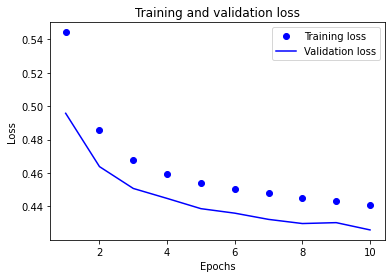

In [25]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

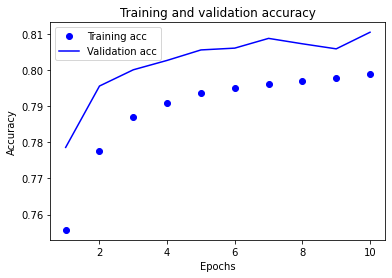

In [26]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()